# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
import seaborn as sns 
import matplotlib.pylab as plt

def dependency_category(column): # создание собственной функции для заданий
    df = pd.DataFrame() # создание отдельного датафрейма
    pd.options.display.float_format = '{:,.2f}%'.format # отображение процентов в таблице
    
    df['кол-во людей в категории'] = data.groupby(column)['debt'].count() # столбец количества людей по категориям от входных данных
    df['% от общего количества заемщиков'] = data.groupby(column)['debt'].count() / data['debt'].count() * 100 # доля клиентов от общего количества заемщиков 
    df['кол-во человек платящих в срок'] = data.groupby(column)['debt'].count() - data.groupby(column)['debt'].sum() # количество людей, которые платят в срок из категории
    df['выплата в срок'] = ((df['кол-во человек платящих в срок'] / data.groupby(column)['debt'].count()) * 100) # процент количество людей, которые платят в срок из категории
    df['отношение неплатящие/платящие'] = data.groupby(column)['debt'].sum() / data.groupby(column)['debt'].count() * 100 # отношение неплатящих к платящим из категории
    
    df = df.sort_values(by='выплата в срок', ascending=False) # сортировка таблицы по столбцу (выплата в срок) по убыванию
    df = df.reset_index().rename(columns={df.index.name:'категория'}) # изменение названия столбца фильтра
    barplot = sns.barplot(x = 'категория', y = 'отношение неплатящие/платящие', data=df) # график показывает максимальное количество неплатящих людей из категории
    plt.xticks(rotation=45) # поворачиваем текст по абсцисе, чтоб был читаем
    barplot.set(xlabel=None, ylabel=None) # скрываем названия координат на графике
       
    return df

,категория,кол-во людей в категории,% от общего количества заемщиков,кол-во человек платящих в срок,выплата в срок,отношение неплатящие/платящие
0,5,9,0.04%,9,100.00%,0.00%
1,0,14107,66.08%,13044,92.46%,7.54%
2,3,330,1.55%,303,91.82%,8.18%
3,1,4809,22.53%,4365,90.77%,9.23%
4,2,2052,9.61%,1858,90.55%,9.45%
5,4,41,0.19%,37,90.24%,9.76%


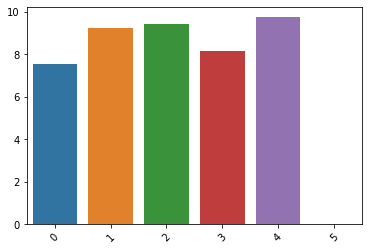

In [23]:
# вызов функции "dependency_category" с фильтром по количеству детей
#сортировка таблицы по столбцу (выплата в срок) по убыванию

dependency_category('children')

**Вывод:** Нет, такой зависимости нет, но имеется другая. Чем больше у людей детей - тем они реже берут кредит.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

,категория,кол-во людей в категории,% от общего количества заемщиков,кол-во человек платящих в срок,выплата в срок,отношение неплатящие/платящие
0,вдовец / вдова,951,4.45%,888,93.38%,6.62%
1,в разводе,1189,5.57%,1105,92.94%,7.06%
2,женат / замужем,12266,57.46%,11339,92.44%,7.56%
3,гражданский брак,4146,19.42%,3761,90.71%,9.29%
4,Не женат / не замужем,2796,13.10%,2523,90.24%,9.76%


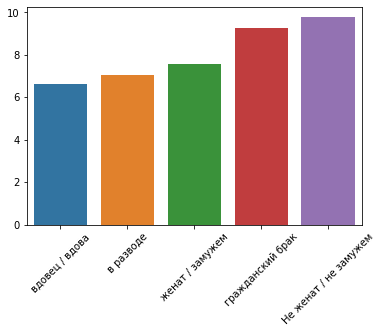

In [24]:
# вызов функции "dependency_category" с фильтром по семейному положению
#сортировка таблицы по столбцу (выплата в срок) по убыванию

dependency_category('family_status')

**Вывод:** Не замужние/Не женатые кредиторы в представленной категории чаще являются должниками

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

,категория,кол-во людей в категории,% от общего количества заемщиков,кол-во человек платящих в срок,выплата в срок,отношение неплатящие/платящие
0,D,349,1.63%,328,93.98%,6.02%
1,B,5014,23.49%,4660,92.94%,7.06%
2,A,25,0.12%,23,92.00%,8.00%
3,C,15938,74.66%,14585,91.51%,8.49%
4,E,22,0.10%,20,90.91%,9.09%


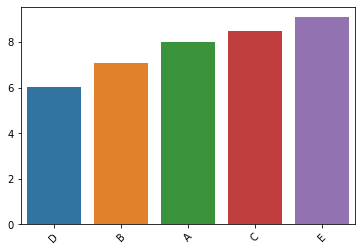

In [25]:
# вызов функции "dependency_category" с фильтром по доходу
#сортировка таблицы по столбцу (выплата в срок) по убыванию

dependency_category('total_income_category')

**Вывод:** Такая зависимость не выявлена. Люди с доходом ниже 50 000 расположились как на первом так и на последнем местах по выплатам в срок.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

,категория,кол-во людей в категории,% от общего количества заемщиков,кол-во человек платящих в срок,выплата в срок,отношение неплатящие/платящие
0,операции с недвижимостью,10754,50.37%,9974,92.75%,7.25%
1,проведение свадьбы,2324,10.89%,2141,92.13%,7.87%
2,получение образования,3989,18.69%,3620,90.75%,9.25%
3,операции с автомобилем,4281,20.05%,3881,90.66%,9.34%


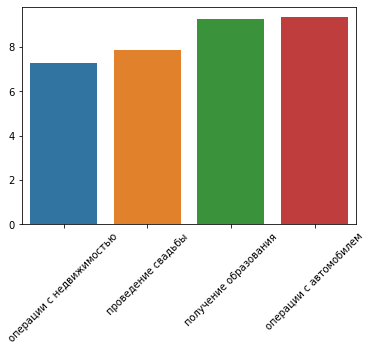

In [26]:
# вызов функции "dependency_category" с фильтром по целям кредита
#сортировка таблицы по столбцу (выплата в срок) по убыванию

dependency_category('purpose_category')

**Вывод:** Из таблицы видно, что люди, имеющие кредит на недвижимость являются самыми стабильными плательщиками. 

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Ошибка при обработке данных, отсутствует проверка вводимых данных 

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* В случае выброса значений в данных сильно изменится среднее арифмитическое и повлияет на модель, поэтому лучше заполнять недостающие количественные значения медианным. (как у нас в случае с детьми / трудовым стажем)

## Общий вывод.

Было проверено четыре гипотезы и установлено:

`1. Есть ли зависимость между количеством детей и возвратом кредита в срок?`

Зависимость не подтвердилась, но нашлась другая. Количество детей в семье напрямую влияет на наличие кредита в целом - число заёмщиков в подкатегориях уменьшается от увеличения детей.

`2. Есть ли зависимость между семейным положением и возвратом кредита в срок?`

Люде не обременённые семейным положением чаще просрачивают кредитные выплаты.


`3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?`

Данная гипотеза не подтвердилась.

`4. Как разные цели кредита влияют на его возврат в срок?`

Кредиторы связанные с недвижимостью платят стабильнее. Возможно тут больше влияет фактор суммы заёма в сравнении с кредитом на `недвижимость` и `автомобиль`. В основном "недвижимость" дороже авто, поэтому увеличивать процент переплат и время из-за несвоевременной оплаты не целесообразно.

**Вывод:**
Одинокие люди, не имеющие собственной семьи и детей являются самыми опасными кредиторами для самих себя, но в то же время наиболее выгодные для банков (выплаты идут хоть и с задержкой).